In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("dark")

In [2]:
train = pd.read_csv("../data/train_big.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target
0,0.0,0.326087,0.419753,0.255132,0.377072,0.770751,0.0
1,0.0,0.315217,0.333333,0.121408,0.690608,0.541502,0.0
2,0.0,0.315217,0.259259,0.203519,0.377072,0.766798,0.0
3,1.0,0.608696,0.629630,0.245161,0.403315,0.027668,0.0
4,0.0,0.663043,0.592593,0.228739,0.415746,0.822134,0.0


In [5]:
x_train_use, y_train_use = train.drop("target", axis = 1), train["target"]

In [6]:
#x_train_use = x_train_use.drop_duplicates().reset_index(drop=True)

In [7]:
train.shape

(15444, 7)

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

In [9]:
x_train.shape, y_train.shape

((12355, 6), (12355,))

### Gaussian NB

In [10]:
nb = GaussianNB()
nb.fit(x_train, np.array(y_train).reshape(-1,1))

GaussianNB()

In [11]:
y_pred = nb.predict(x_train)

In [12]:
f1_score(y_train, y_pred)

0.8386317907444668

In [13]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [14]:
model = nb

In [15]:
model.fit(x_train, y_train)

GaussianNB()

In [16]:
y_pred = model.predict(x_train)

In [17]:
f1_score(y_train, y_pred)

0.8386317907444668

In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      6154
         1.0       0.84      0.84      0.84      6201

    accuracy                           0.84     12355
   macro avg       0.84      0.84      0.84     12355
weighted avg       0.84      0.84      0.84     12355



In [19]:
train["target"].value_counts()

0.0    7722
1.0    7722
Name: target, dtype: int64

In [20]:
import seaborn as sns; sns.set_style("darkgrid")

<AxesSubplot:>

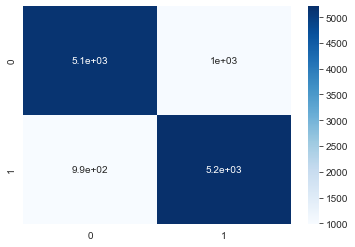

In [21]:
conf = confusion_matrix(y_train, y_pred)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [22]:
y_pred_val = model.predict(x_val)

In [23]:
f1_score(y_val, y_pred_val)

0.8376623376623377

In [24]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1568
         1.0       0.83      0.85      0.84      1521

    accuracy                           0.84      3089
   macro avg       0.84      0.84      0.84      3089
weighted avg       0.84      0.84      0.84      3089



#### Extracting results

In [25]:
import time
start = time.time()
model.fit(x_train_use, y_train_use)
elapsed = time.time() - start

In [26]:
pred_use = model.predict(x_train_use)

In [27]:
cross_val_score(model, x_train_use, y_train_use, scoring="f1")

array([0.83737472, 0.83583062, 0.83602324, 0.84573269, 0.83611825])

In [28]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      7722
         1.0       0.84      0.84      0.84      7722

    accuracy                           0.84     15444
   macro avg       0.84      0.84      0.84     15444
weighted avg       0.84      0.84      0.84     15444



In [29]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [30]:
test

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target
0,0.0,0.597826,0.567901,0.209384,0.446133,0.782609,0.0
1,1.0,0.902174,0.753086,0.140762,0.566298,0.399209,1.0
2,1.0,0.326087,0.271605,0.178299,0.527624,0.462451,0.0
3,0.0,0.869565,0.691358,0.241056,0.412983,0.055336,0.0
4,0.0,0.771739,0.580247,0.401173,0.277624,0.509881,0.0
...,...,...,...,...,...,...,...
1995,0.0,0.554348,0.530864,0.141935,0.558011,0.747036,0.0
1996,0.0,0.391304,0.604938,0.120821,0.675414,0.007905,0.0
1997,0.0,0.543478,0.740741,0.079765,0.727901,0.027668,0.0
1998,0.0,0.173913,0.222222,0.903226,0.075967,0.071146,1.0


In [32]:
x_test, y_test = test.drop("target", axis =1), test["target"]

In [33]:
pred_test = model.predict(x_test)

In [34]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1939
         1.0       0.12      0.72      0.20        61

    accuracy                           0.83      2000
   macro avg       0.55      0.78      0.55      2000
weighted avg       0.96      0.83      0.88      2000



In [35]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [36]:
conf = confusion_matrix(y_test, pred_test)

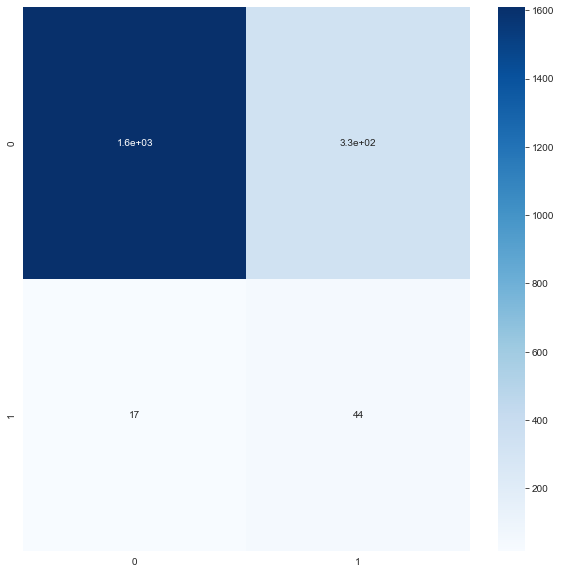

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(conf, annot=True, cmap="Blues")
#plt.show();
plt.savefig("../conf/svc.png")

In [38]:
df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Naive Bayes"
df["elapsed"] = elapsed

In [39]:
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.202299,0.838672,0.836511,0.117647,0.840844,0.721311,Naive Bayes,0.004069


In [40]:
df.to_csv("../results/regular/nb.csv", index=False)